# Coinmarketcap Web Scraping

Import packages

In [4]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import re

Define `fetch_data` and `create_plot` functions

In [50]:
def fetch_data():
    url = "https://coinmarketcap.com/"
    response = requests.get(url)
    
    if response.status_code != 200:
        print("Error accessing the page")
        return
        
    soup = BeautifulSoup(response.content, 'html.parser')
    
    last_div = soup.select(".grid")[-1]
    
    if not last_div:
        print("DIV NOT found")
        return
    
    table = last_div.find('table')
    
    if not table:
        print("table NOT found inside DIV.")
        return
    
    thead = table.find('thead')
    if not thead:
        print("thead NOT found")
        return
    
    header_row = thead.find('tr')
    if not header_row:
        print("header row NOT found")
        return
    
    column_titles = [header.text.strip() for header in header_row.find_all('th')]
    if not ("Price" in column_titles and "Name" in column_titles):
        print("columns 'Price' and 'Name' NOT found.")
        return
    
    if not ('Price' in column_titles and 'Name' in column_titles):
        print("price or name not in column_titles")
        return
    
    price_index = column_titles.index('Price')
    name_index = column_titles.index('Name')
    
    rows = table.find_all('tr')
    
    data = []
    if len(rows) > 1:
        for row in rows[1:]:
            column_values = [column.text.strip() for column in row.find_all('td')]
    
            if len(column_values) > max(price_index, name_index):
                coin_name = column_values[name_index].strip()
                price_24h = re.sub(r'[^0-9.]?', "",column_values[price_index].strip())
    
                data.append([coin_name,price_24h])
    
    if not data:
        print("data is empty")
        return
    
    df = pd.DataFrame(data, columns=['Cryptocurrencies', 'Price last information'])
    df['Price last information'] = pd.to_numeric(df['Price last information'], errors='coerce')
    return df

def create_plot(df):
    spacing_between_currencies = 0.2  
    line_size = 2  
    size_marker = 8  
    total_width_coins = len(df['Cryptocurrencies']) * spacing_between_currencies
    
    fig = plt.figure(figsize=(total_width_coins, 5))
    plt.bar(df['Cryptocurrencies'], df['Price last information'], color='#0ae448')
    plt.title('Cryptocurrency Price (2024-01-05 01:50:18)')
    #plt.xlabel('Cryptocurrencies')
    plt.ylabel('Price last information')
    plt.xticks(rotation=90, ha='center')
    plt.tight_layout()
    plt.xlim(-0.75, len(df["Cryptocurrencies"])-0.25)
    plt.yscale("log")
    plt.savefig('graphic.png')
    plt.show()

In [37]:
data = fetch_data()

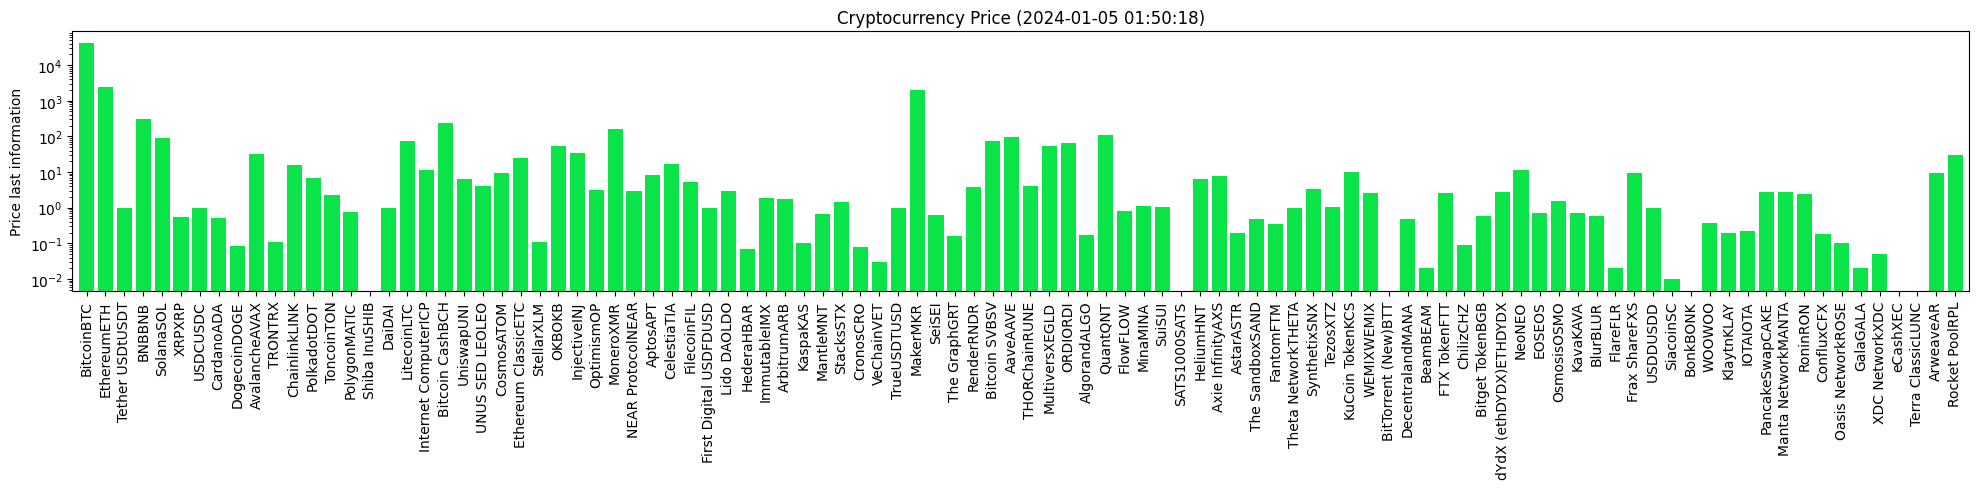

In [51]:
create_plot(data)